In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Joins
We are going to study another table method `join`.

## Joining 2 Tables
Let's say we have the 2 tables `drinks` and `discounts`. 

In [2]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [3]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


Let's say we want to know how much discount we can get from each drink. For this purpose, we need some method to combine `drinks` with `discounts`. We can do this using the method `join`.

In [4]:
drinks.join('Cafe', discounts, 'Location')

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


This is similar to saying: "Join the `Cafe` column from the `drinks` table using the `Location` column from the `discounts` table"

When we call `.join`, Python keeps all rows where the `Cafe` column in `drinks` and the `Location` column in `discounts` match. There were no match for Abe's, so it is included in the resulting table.
<img src = 'cafes.jpg' width = 700/>
This example is not the best example either since it includes a duplicate location in the `discounts` table. A good practice would be to take only the `max` of the 2 discounts in Tea One.

Let's call the table that we created earlier `t`.

In [5]:
t = drinks.join('Cafe', discounts, "Location")
t

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


What if we also want to know the new price after the discount? We know that the new price can be computed by:

\begin{align}
new = price \times \frac{100 - coupon}{100}
\end{align}

Using the formula above with `columns`,

In [7]:
new = t.column('Price') * (100-t.column('Coupon % off'))/100
new

array([1. , 1.5, 3. , 3.8])

We get the array of the new prices! Now we can add the new array to the table.

In [ ]:
t.with_column('Discounted', discounted_array)

## Bike Trips Dataset
In San Francisco and Bay Area, there is a bike rent company called [Bay Area Bike Share](http://www.bayareabikeshare.com/) where people can rent bikes and return them somewhere else. If the bike trip is under 30 minutes, the fee is free. 

The company recorded a dataset of all the different starting and end points for every trip. We are going to analyze this dataset. The `Duration` data are in seconds.

In [2]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


The durations are in seconds. If we try to sort the table above based on the trip time, we'll get the following,

In [10]:
trips.sort('Duration', descending = True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


There's a trip with 17270400 seconds! If we convert this number to days,

In [12]:
trips.sort('Duration', descending = True).row(0).item('Duration') / 3600 / 24

199.88888888888889

This trip amounts to 200 days! This has to be a stolen bike.

We can expect that there will be a lot of "less-than-30" mins trip because of the free deal. We can try creating a histogram to see the distribution of the trips.

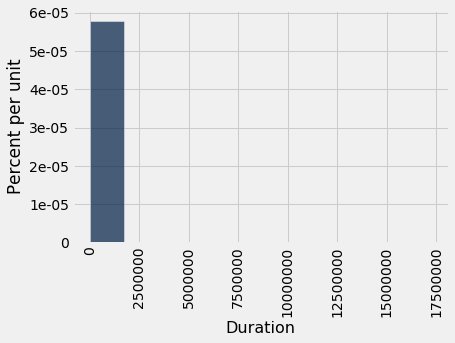

In [13]:
trips.hist('Duration')

The histogram above does not seem helpful! This is because the histogram above takes into account the 200-days data point.

We can filter the data points so that the histogram only shows the trips below 30 minutes mark.

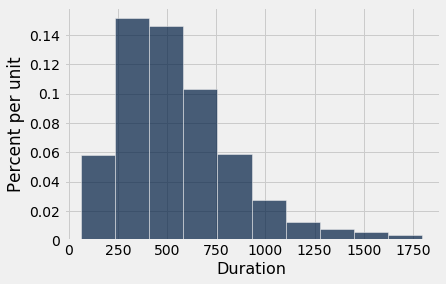

In [14]:
trips.where('Duration', are.below(1800)).hist('Duration')

It appears that most trips are between 250 to 600 seconds! We can change the bins to be every 60 secs and change the unit to be in seconds.

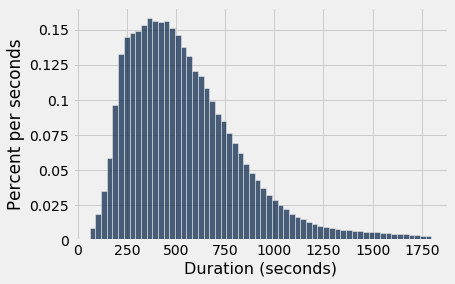

In [16]:
trips.where('Duration', are.below(1800)).hist('Duration', bins = 60, unit = 'seconds')

Above, we can see that most trips are under 10 minutes!

Now we will analyze the trips that are under 30 minutes. We will name this table `commute` since most people commute with bikes (30 mins to work and 30 mins back). 

In [3]:
commute = trips.where('Duration', are.below(1800))
commute.show(5)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


Below we `group` the table based on the `Start Station`, count the amount of times that `Start Station` was used and sort the table starting from the highest count. In other words, we are analyzing the most popular `Start Station`.

In [12]:
starts = commute.group('Start Station').sort('count', descending = True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


And below, we get the count of trips for every possible unique combination of start and end station using the `pivot` method.

In [20]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Going back to our `trips` table, let's filter the table so that it only shows `Start`, `End`, and `Duration`. We'll call this table `duration`.

In [4]:
duration = trips.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


Let's say we want to find the shortest trip for every unique `Start` and `End` stations in this table. We might think to do the following,

In [8]:
duration.sort('Duration')

Start Station,End Station,Duration
Temporary Transbay Terminal (Howard at Beale),Temporary Transbay Terminal (Howard at Beale),60
San Francisco Caltrain 2 (330 Townsend),San Francisco Caltrain 2 (330 Townsend),60
Howard at 2nd,Howard at 2nd,60
San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),60
Post at Kearny,2nd at South Park,60
Spear at Folsom,Spear at Folsom,60
Steuart at Market,Steuart at Market,60
Howard at 2nd,Howard at 2nd,60
Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),60
San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain (Townsend at 4th),60


However, the table above also includes duplicate pairs of `Start` and `End` stations! Instead, we should use `group` with 2 columns to find the shortest trip for every unique pair of start-end stations.

In [5]:
shortest = duration.group(make_array('Start Station', 'End Station'), min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


From the `shortest` table above, let's say we are interested in data where the starting station is the Civic Center BART station. 

In [15]:
shortest.where('Start Station', are.containing('Civic Center BART')).sort('Duration min')

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


The table above gives us a sense of how far other stations are from Civic Center station. But what if we want to know where those stations are rather than just an estimate from another station? Draw a `Map`!

# Maps 
Below we have a dataset of stations and their latitude and longitude. When we have a latitude and longitude, we can pinpoint a location on the globe. 

In [6]:
# 'stations' contains geographical info like latitude, longitude, landmark
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


We can create a map using the `Marker` method `map_table`. The `map_table` method takes in a table with a certain arrangement. See example below,

In [17]:
Marker.map_table(stations.select('lat', 'long', 'name'))

c:\users\ronald yonggi\appdata\local\programs\python\python37-32\lib\site-packages\datascience\maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


A table containing columns of latitude and longitude values can be used to generate a map of markers.
<img src = 'map.jpg' width = 500/>
In the example above, we used `Markers`. In the upcoming example below, we use `Circle`.

The columns format 2-4 are optional, but columns of latitudes and longitudes are required.

Below, we filter the `stations` table so that it only shows the rows with **San Francisco** landmark. Let's name this table `sf`.

In [7]:
sf = stations.where('landmark', 'San Francisco')
sf

station_id,name,lat,long,dockcount,landmark,installation
41,Clay at Battery,37.795,-122.4,15,San Francisco,8/19/2013
42,Davis at Jackson,37.7973,-122.398,15,San Francisco,8/19/2013
45,Commercial at Montgomery,37.7942,-122.403,15,San Francisco,8/19/2013
46,Washington at Kearney,37.7954,-122.405,15,San Francisco,8/19/2013
47,Post at Kearney,37.789,-122.403,19,San Francisco,8/19/2013
48,Embarcadero at Vallejo,37.8,-122.399,15,San Francisco,8/19/2013
49,Spear at Folsom,37.7903,-122.391,19,San Francisco,8/20/2013
50,Harry Bridges Plaza (Ferry Building),37.7954,-122.394,23,San Francisco,8/20/2013
51,Embarcadero at Folsom,37.7915,-122.391,19,San Francisco,8/20/2013
39,Powell Street BART,37.7839,-122.408,19,San Francisco,8/25/2013


Now let's construct the `Circle` map.

In [22]:
Circle.map_table(sf.select('lat', 'long', 'name'))

We can't see the stations clearly in the map above because the blue dots are too small! In this case, we can change dots color and the size.

In [23]:
Circle.map_table(sf.select('lat', 'long', 'name'), color = 'green', radius = 150)

Now what if we want a map that include all landmarks, but gives different color for stations that are in different landmarks? (e.g. blue markers for San Jose, red markers for San Francisco, etc.)

First we group the `stations` by landmarks,

In [27]:
stations.group('landmark')

landmark,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


Now add arbitrary colors to each landmark above and name the table `colors`.

In [8]:
colors = stations.group('landmark').with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


Now we can `join` the table above with the original `stations` table! Note that if the label columns to be joined are the same for both tables, we can omit the 3rd argument of the method `join`.

In [10]:
colored = stations.join('landmark', colors)
colored

landmark,station_id,name,lat,long,dockcount,installation,count,color
Mountain View,27,Mountain View City Hall,37.3892,-122.082,15,8/16/2013,7,blue
Mountain View,28,Mountain View Caltrain Station,37.3944,-122.077,23,8/15/2013,7,blue
Mountain View,29,San Antonio Caltrain Station,37.4069,-122.107,23,8/15/2013,7,blue
Mountain View,30,Evelyn Park and Ride,37.3903,-122.067,15,8/16/2013,7,blue
Mountain View,31,San Antonio Shopping Center,37.4004,-122.108,15,12/31/2013,7,blue
Mountain View,32,Castro Street and El Camino Real,37.386,-122.084,11,12/31/2013,7,blue
Mountain View,33,Rengstorff Avenue / California Street,37.4002,-122.099,15,8/16/2013,7,blue
Palo Alto,34,Palo Alto Caltrain Station,37.444,-122.165,23,8/14/2013,5,red
Palo Alto,35,University and Emerson,37.4445,-122.163,11,8/15/2013,5,red
Palo Alto,36,California Ave Caltrain Station,37.4291,-122.143,15,8/14/2013,5,red


Now we can create a map with corresponding station colors for different regions!

In [11]:
Marker.map_table(colored.select('lat', 'long', 'name', 'color'))

c:\users\ronald yonggi\appdata\local\programs\python\python37-32\lib\site-packages\datascience\maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


Now going back to the `starts` table,

In [13]:
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


What if we want to make a map in which stations that are more popular as a starting station have bigger marker?

As previously done, we start with joining the table above with the original `stations` table,

In [16]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


From the table above, let's take only the columns that we need and add a color, into a new table,

In [21]:
ready_to_map = station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'size', station_starts.column('count') * 100
)
ready_to_map

lat,long,name,color,size
37.7853,-122.396,2nd at Folsom,blue,784100
37.7823,-122.393,2nd at South Park,blue,927400
37.7805,-122.39,2nd at Townsend,blue,1367400
37.7818,-122.405,5th at Howard,blue,739400
37.3314,-121.893,Adobe on Almaden,blue,52200
37.3327,-121.9,Arena Green / SAP Center,blue,59000
37.7923,-122.397,Beale at Market,blue,813500
37.7985,-122.401,Broadway St at Battery St,blue,746000
37.4291,-122.143,California Ave Caltrain Station,blue,30000
37.386,-122.084,Castro Street and El Camino Real,blue,113700


And use the resulting table above to create the `Circle` map!

In [22]:
Circle.map_table(ready_to_map)